In [1]:
import keras
import numpy as np
import tensorflow as tf

import os
import cv2
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import time
import random
tf.__version__

C:\Users\Abhishek\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'1.12.0'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)
y_train=keras.utils.np_utils.to_categorical(y_train)
y_test=keras.utils.np_utils.to_categorical(y_test)

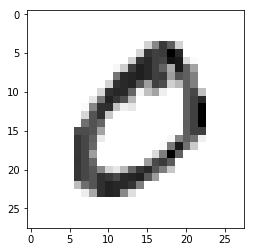

In [3]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()
y_train[1]
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [4]:
print(x_train.shape)
print(y_train.shape[1])
print(np.unique(y_train).size)

(60000, 28, 28)
10
2


In [5]:
output_dim=y_train.shape[1]
modelNN=keras.models.Sequential()
modelNN.add(keras.layers.Flatten())
modelNN.add(keras.layers.Dense(128,activation="relu"))
modelNN.add(keras.layers.Dense(128,activation="relu"))
modelNN.add(keras.layers.Dense(output_dim,activation="softmax"))

modelNN.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = modelNN.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.2595 - acc: 0.9237 - val_loss: 0.1338 - val_acc: 0.9589
Epoch 2/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1057 - acc: 0.9672 - val_loss: 0.1032 - val_acc: 0.9686
Epoch 3/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0725 - acc: 0.9768 - val_loss: 0.1136 - val_acc: 0.9643
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0521 - acc: 0.9835 - val_loss: 0.0899 - val_acc: 0.9738
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0408 - acc: 0.9862 - val_loss: 0.0946 - val_acc: 0.9733
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0304 - acc: 0.9901 - val_loss: 0.0900 - val_acc: 0.9729
Epoch 7/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0237 - acc: 0.9918 - val_loss: 0.0971 

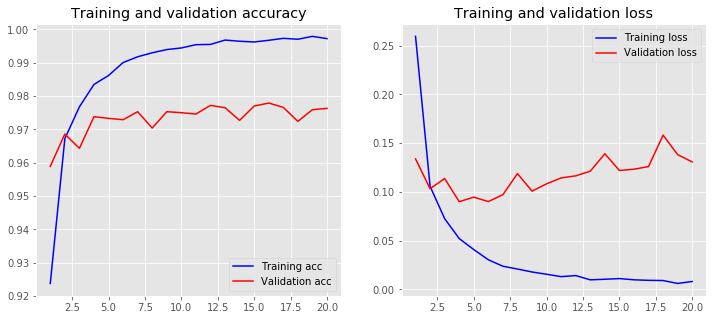

In [7]:
plot_history(history)
plt.show()

In [8]:
DATADIR="C:/Users/Abhishek/Documents/cat_dog_images"
CATEGORIES=["Dog","Cat"]

In [9]:
#### Loading cat dog data
RESIZE=70

training_data=[]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(RESIZE,RESIZE))
            training_data.append([new_array,class_num])
        except Exception as e :
            pass
    

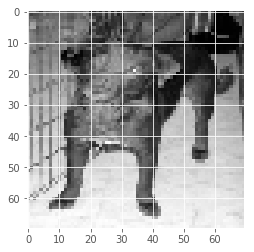

In [10]:
plt.imshow(training_data[1][0],cmap="gray")
plt.show()

In [11]:
random.shuffle(training_data)

In [12]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,RESIZE,RESIZE,1)

In [13]:
pickle_out = open(os.path.join(DATADIR,"X.pickle"),"wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(DATADIR,"y.pickle"),"wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [14]:
pickle_in = open(os.path.join(DATADIR,"X.pickle"),"rb")
X=pickle.load(pickle_in)

pickle_in = open(os.path.join(DATADIR,"y.pickle"),"rb")
y=pickle.load(pickle_in)

In [15]:
NAME="CvsD-CNN-128x2-{}".format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))

In [16]:
tensorboard

In [17]:
X=X/255.0

#modelCN=keras.models.Sequential()
#modelCN.add(keras.layers.Conv2D(128,(3,3),input_shape=X.shape[1:]))
#modelCN.add(keras.layers.Activation("relu"))
#modelCN.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#modelCN.add(keras.layers.Conv2D(128,(3,3)))
#modelCN.add(keras.layers.Activation("relu"))
#modelCN.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#modelCN.add(keras.layers.Flatten())
#modelCN.add(keras.layers.Dense(128))
#modelCN.add(keras.layers.Activation("relu"))
#modelCN.add(keras.layers.Dense(1))
#modelCN.add(keras.layers.Activation('sigmoid'))

#modelCN.compile(loss="binary_crossentropy",
#              optimizer="adam",metrics=["accuracy"])
#histCN=modelCN.fit(X,y,batch_size=32,validation_split=0.2,epochs=20,callbacks=[tensorboard])

In [18]:
#plot_history(histCN)
#plt.show()

In [19]:
import time
import keras.layers as kl

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]
#tensorboard=TensorBoard(log_dir='logs_all/{}'.format(NAME))

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            print(NAME)
            tensorboard=TensorBoard(log_dir='logs_all/{}'.format(NAME))
            
            model=keras.models.Sequential()
            model.add(kl.Conv2D(layer_size,(3,3),input_shape=X.shape[1:]))
            model.add(kl.Activation('relu'))
            model.add(kl.MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(kl.Conv2D(layer_size,(3,3),input_shape=X.shape[1:]))
                model.add(kl.Activation('relu'))
                model.add(kl.MaxPooling2D(pool_size=(2,2)))
                
            model.add(kl.Flatten())
            for l in range(dense_layer):
                model.add(kl.Dense(layer_size))
                model.add(kl.Activation('relu'))
            
            model.add(kl.Dense(1))
            model.add(kl.Activation('sigmoid'))
            model.compile(loss='binary_crossentropy',
                          optimizer='adam',metrics=['accuracy'])
            model.fit(X,y,batch_size=32,epochs=7,
                      validation_split=0.3,callbacks=[tensorboard])


3-conv-64-nodes-0-dense-1545949445
Train on 17462 samples, validate on 7484 samples
Epoch 1/7
17462/17462 [==============================] - 18s 1ms/step - loss: 0.6238 - acc: 0.6378 - val_loss: 0.5350 - val_acc: 0.7413
Epoch 2/7
17462/17462 [==============================] - 17s 952us/step - loss: 0.5109 - acc: 0.7521 - val_loss: 0.5009 - val_acc: 0.7533
Epoch 3/7
17462/17462 [==============================] - 17s 1000us/step - loss: 0.4582 - acc: 0.7825 - val_loss: 0.4596 - val_acc: 0.7866
Epoch 4/7
17462/17462 [==============================] - 17s 968us/step - loss: 0.4126 - acc: 0.8119 - val_loss: 0.4323 - val_acc: 0.8022
Epoch 5/7
17462/17462 [==============================] - 17s 990us/step - loss: 0.3803 - acc: 0.8279 - val_loss: 0.4169 - val_acc: 0.8145
Epoch 6/7
17462/17462 [==============================] - 16s 903us/step - loss: 0.3467 - acc: 0.8457 - val_loss: 0.3986 - val_acc: 0.8247
Epoch 7/7
17462/17462 [==============================] - 16s 932us/step - loss: 0.3107 - 

In [20]:
model.save("CNN-3-D-0-64.model")

In [23]:
CATEGORIES=["Dog","Cat"]
RESIZE=70

def prepare(filepath):
    Dog_img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    Dog_img=cv2.resize(Dog_img,(RESIZE,RESIZE))
    return Dog_img.reshape(-1,RESIZE,RESIZE,1)

Dog_img=prepare("C:/Users/Abhishek/Documents/cat_dog_images/dog.jpg")
Cat_img=prepare("C:/Users/Abhishek/Documents/cat_dog_images/cat.jpg")

model_loaded=keras.models.load_model("CNN-3-D-0-64.model")



In [27]:
prediction=model_loaded.predict([Dog_img])
print(CATEGORIES[int(prediction)])

Dog


In [28]:
prediction=model_loaded.predict([Cat_img])
print(CATEGORIES[int(prediction)])

Cat
